In [1]:
#!pip install gensim
from gensim import models, corpora
import pandas as pd
import pyLDAvis.gensim

In [2]:
def prep_corpus(fname):
    "reads in file, makes a gensim-usable corpus out of it"

    with open(fname, 'r') as f:
        docs_full = f.readlines()

    docs = [x.split('\t')[1].split() for x in docs_full]
    for doc in docs:
        while '<NUMBER>' in doc:
            doc.remove('<NUMBER>')
        while 'patient' in doc:
            doc.remove('patient')
        while 'cell' in doc:
            doc.remove('cell')

    dictionary = corpora.Dictionary(docs)
    corpus = [dictionary.doc2bow(doc) for doc in docs]

    return corpus, dictionary, docs


def prep_corpus_csv(fname):
    "reads in file, makes a gensim-usable corpus out of it"

    d = pd.read_csv(fname)
        
    docs = []
    for i in range(len(d.index)):
        docs.append(d.iloc[i,2].split())
    
    for doc in docs:
        while '<NUMBER>' in doc:
            doc.remove('<NUMBER>')
        while 'patient' in doc:
            doc.remove('patient')
        while 'cell' in doc:
            doc.remove('cell')

    dictionary = corpora.Dictionary(docs)
    corpus = [dictionary.doc2bow(doc) for doc in docs]

    return corpus, dictionary, docs


In [3]:
corp, dictionary, docs = prep_corpus_csv('sampledata.csv')
corp2, dictionary2, docs2 = prep_corpus('pubmed_subset_13.tsv')


In [4]:

lda_model = models.LdaModel(corpus=corp, 
 num_topics=6, 
 id2word=dictionary, 
 distributed=False, 
 chunksize=2000, 
 passes=10, 
 update_every=1, 
 alpha='auto', 
 eta=None, 
 decay=0.5, 
 offset=1.0, 
 eval_every=10, 
 iterations=50, 
 gamma_threshold=0.001, 
 minimum_probability=0.01, 
 random_state=3, 
 ns_conf=None, 
 minimum_phi_value=0.01, 
 per_word_topics=False, 
 callbacks=None)

In [6]:
lda_model.get_topic_terms(5)

[(132, 0.0072531216),
 (72, 0.0052513867),
 (753, 0.0050180494),
 (288, 0.004766163),
 (403, 0.004739841),
 (138, 0.004454454),
 (129, 0.0040869797),
 (300, 0.004029811),
 (82, 0.0036348777),
 (565, 0.0035228718)]

In [10]:
lda_model.print_topic(4, 200)

'0.004*"virus" + 0.004*"vaccine" + 0.004*"target" + 0.003*"protein" + 0.003*"system" + 0.003*"disease" + 0.003*"infection" + 0.003*"gene" + 0.003*"treatment" + 0.003*"human" + 0.003*"strain" + 0.003*"therapy" + 0.003*"receptor" + 0.002*"expression" + 0.002*"level" + 0.002*"clinical" + 0.002*"reduce" + 0.002*"viral" + 0.002*"activity" + 0.002*"challenge" + 0.002*"mouse" + 0.002*"evidence" + 0.002*"provide" + 0.002*"decrease" + 0.002*"new" + 0.002*"tumor" + 0.002*"antibody" + 0.002*"Nef" + 0.002*"data" + 0.002*"drug" + 0.002*"change" + 0.002*"induce" + 0.002*"strategy" + 0.002*"potential" + 0.002*"liver" + 0.002*"model" + 0.002*"role" + 0.002*"HIV-1" + 0.002*"measure" + 0.001*"mechanism" + 0.001*"pharmacological" + 0.001*"de" + 0.001*"report" + 0.001*"sequence" + 0.001*"microbiome" + 0.001*"novel" + 0.001*"follow" + 0.001*"present" + 0.001*"therapeutic" + 0.001*"health" + 0.001*"safe" + 0.001*"condition" + 0.001*"CpG" + 0.001*"parent" + 0.001*"rate" + 0.001*"intervention" + 0.001*"day" +

In [5]:
lda_visualization = pyLDAvis.gensim.prepare(lda_model, corp, dictionary, sort_topics=False)
pyLDAvis.display(lda_visualization)

In [6]:
lda_model_same = lda_model = models.LdaModel(corpus=corp, 
 num_topics=6, 
 id2word=dictionary, 
 distributed=False, 
 chunksize=2000, 
 passes=5, 
 update_every=1, 
 alpha='auto', 
 eta=None, 
 decay=0.5, 
 offset=1.0, 
 eval_every=10, 
 iterations=50, 
 gamma_threshold=0.001, 
 minimum_probability=0.01, 
 random_state=2, 
 ns_conf=None, 
 minimum_phi_value=0.01, 
 per_word_topics=False, 
 callbacks=None)

In [36]:
df, wordlist = lda_model.diff(lda_model_same)

In [29]:
df = pd.DataFrame(df)
df

,0,1,2,3,4,5
0,0.000000,0.964302,0.955672,0.940176,0.954978,1.000000
1,0.804100,0.000000,0.836121,0.831595,0.817461,0.847809
2,0.830991,0.837529,0.000000,0.747356,0.800718,0.795875
3,0.844530,0.851702,0.780103,0.000000,0.836585,0.825798
4,0.790973,0.805307,0.774175,0.769585,0.000000,0.796840
5,0.821110,0.807799,0.767472,0.743470,0.808480,0.000000


In [21]:
wordlist = pd.DataFrame(wordlist)
wordlist.iloc[1,0]

[['expression',
  'health',
  'provide',
  'response',
  'TBI',
  'development',
  'year',
  'system',
  'mechanism',
  'injury'],
 ['acid',
  'CI',
  'viral',
  'range',
  'case',
  'receptor',
  'HCV',
  'scan',
  'characteristic',
  'deliver']]

In [11]:
lda_model2 = lda_model = models.LdaModel(corpus=corp2, 
 num_topics=6, 
 id2word=dictionary2, 
 distributed=False, 
 chunksize=2000, 
 passes=5, 
 update_every=1, 
 alpha='auto', 
 eta=None, 
 decay=0.5, 
 offset=1.0, 
 eval_every=10, 
 iterations=50, 
 gamma_threshold=0.001, 
 minimum_probability=0.01, 
 random_state=2, 
 ns_conf=None, 
 minimum_phi_value=0.01, 
 per_word_topics=False, 
 callbacks=None)

In [12]:
lda_visualization = pyLDAvis.gensim.prepare(lda_model2, corp2, dictionary2, sort_topics=False)
pyLDAvis.display(lda_visualization)

In [13]:
df2, wordlist2 = lda_model.diff(lda_model2)

In [48]:
df2 = pd.DataFrame(df2)
df2

,0,1,2,3,4,5
0,0.000000,0.606706,1.000000,0.764545,0.811079,0.912881
1,0.640657,0.000000,0.822754,0.488847,0.584167,0.878897
2,0.951692,0.851102,0.000000,0.850408,0.631381,0.602300
3,0.817281,0.596190,0.906516,0.000000,0.755259,0.962877
4,0.753100,0.569496,0.657047,0.628122,0.000000,0.779699
5,0.869571,0.853000,0.589819,0.828014,0.757033,0.000000


In [14]:
wordlist2 = pd.DataFrame(wordlist2)
wordlist2.iloc[0,1]

[['novel',
  'condition',
  'activity',
  'tissue',
  'provide',
  'development',
  'response',
  'signal',
  'target',
  'system'],
 ['mrna',
  'vaccine',
  'membrane',
  'brain',
  'range',
  'regulation',
  'flow',
  'data',
  'experiment',
  'addition']]

In [8]:
def format_topics_sentences(ldamodel=None, corpus=None, texts=None):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [17]:

lda_model2 = lda_model = models.LdaModel(corpus=corp2, 
 num_topics=6, 
 id2word=dictionary2, 
 distributed=False, 
 chunksize=2000, 
 passes=5, 
 update_every=1, 
 alpha='auto', 
 eta=None, 
 decay=0.5, 
 offset=1.0, 
 eval_every=10, 
 iterations=50, 
 gamma_threshold=0.001, 
 minimum_probability=0.01, 
 random_state=2, 
 ns_conf=None, 
 minimum_phi_value=0.01, 
 per_word_topics=False, 
 callbacks=None)



In [23]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model2, corpus=corp2, texts=docs2)
pd.options.display.max_colwidth = 80
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.9681,"treatment, clinical, year, case, disease, risk, age, outcome, rate, CI","[Angiolymphoid, hyperplasia, eosinophilia, ALHE, uncommon, benign, condition..."
1,1,4.0,0.5888,"specie, model, data, different, base, provide, gene, sample, sequence, propose","[present, complete, mitochondrial, genome, sequence, Bubo, bubo, PCR, amplif..."
2,2,2.0,0.8147,"health, care, age, risk, year, data, child, factor, time, woman","[Nurses, intensive, care, unit, confront, various, challenge, problem, every..."
3,3,1.0,0.6753,"structure, protein, system, acid, surface, property, different, model, chang...","[aim, animal, narrow, concave-straight, wide, anatomic, healing, abutment, c..."
4,4,2.0,0.9936,"health, care, age, risk, year, data, child, factor, time, woman","[predictor, hope, literature, review, meta-analysis, mean, size, ES, predict..."
5,5,5.0,0.8416,"treatment, clinical, year, case, disease, risk, age, outcome, rate, CI","[febrile, seizure, FS, frequent, type, seizure, child, neurologically, norma..."
6,6,5.0,0.8604,"treatment, clinical, year, case, disease, risk, age, outcome, rate, CI","[CLINICAL, SCENARIO, Proper, neuromuscular, activation, quadriceps, muscle, ..."
7,7,5.0,0.6891,"treatment, clinical, year, case, disease, risk, age, outcome, rate, CI","[aim, association, combination, body, mass, index, BMI, categories, level, p..."
8,8,3.0,0.9956,"cancer, drug, concentration, treatment, nanoparticles, system, antimicrobial...","[phagocytosis, important, function, invertebrate, vertebrate, blood, phagocy..."
9,9,0.0,0.5170,"expression, gene, protein, level, mouse, role, activity, pathway, response, ...","[aim, gray, matter, GM, volume, white, matter, WM, integrity, Apolipoprotein..."


In [20]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 80

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9976,"expression, gene, protein, level, mouse, role, activity, pathway, response, ...","[present, aim, verify, tumor, necrosis, factor, receptor‑associated, factor,..."
1,1.0,0.9979,"structure, protein, system, acid, surface, property, different, model, chang...","[chaotropes, like, urea, guanidinium, chloride, GdmCl, tend, destabilize, ko..."
2,2.0,0.9981,"health, care, age, risk, year, data, child, factor, time, woman","[Religious, hospital, grow, part, American, healthcare, system, receive, obs..."
3,3.0,0.9963,"cancer, drug, concentration, treatment, nanoparticles, system, antimicrobial...","[antibiotic, resistance, challenging, concern, infectious, disease, require,..."
4,4.0,0.9972,"specie, model, data, different, base, provide, gene, sample, sequence, propose","[wildflower, strip, WFS, increasingly, counteract, negative, consequence, ag..."
5,5.0,0.9991,"treatment, clinical, year, case, disease, risk, age, outcome, rate, CI","[Redo, surgery, persist, pelvic, sepsis, chronic, presacral, sinus, anterior..."


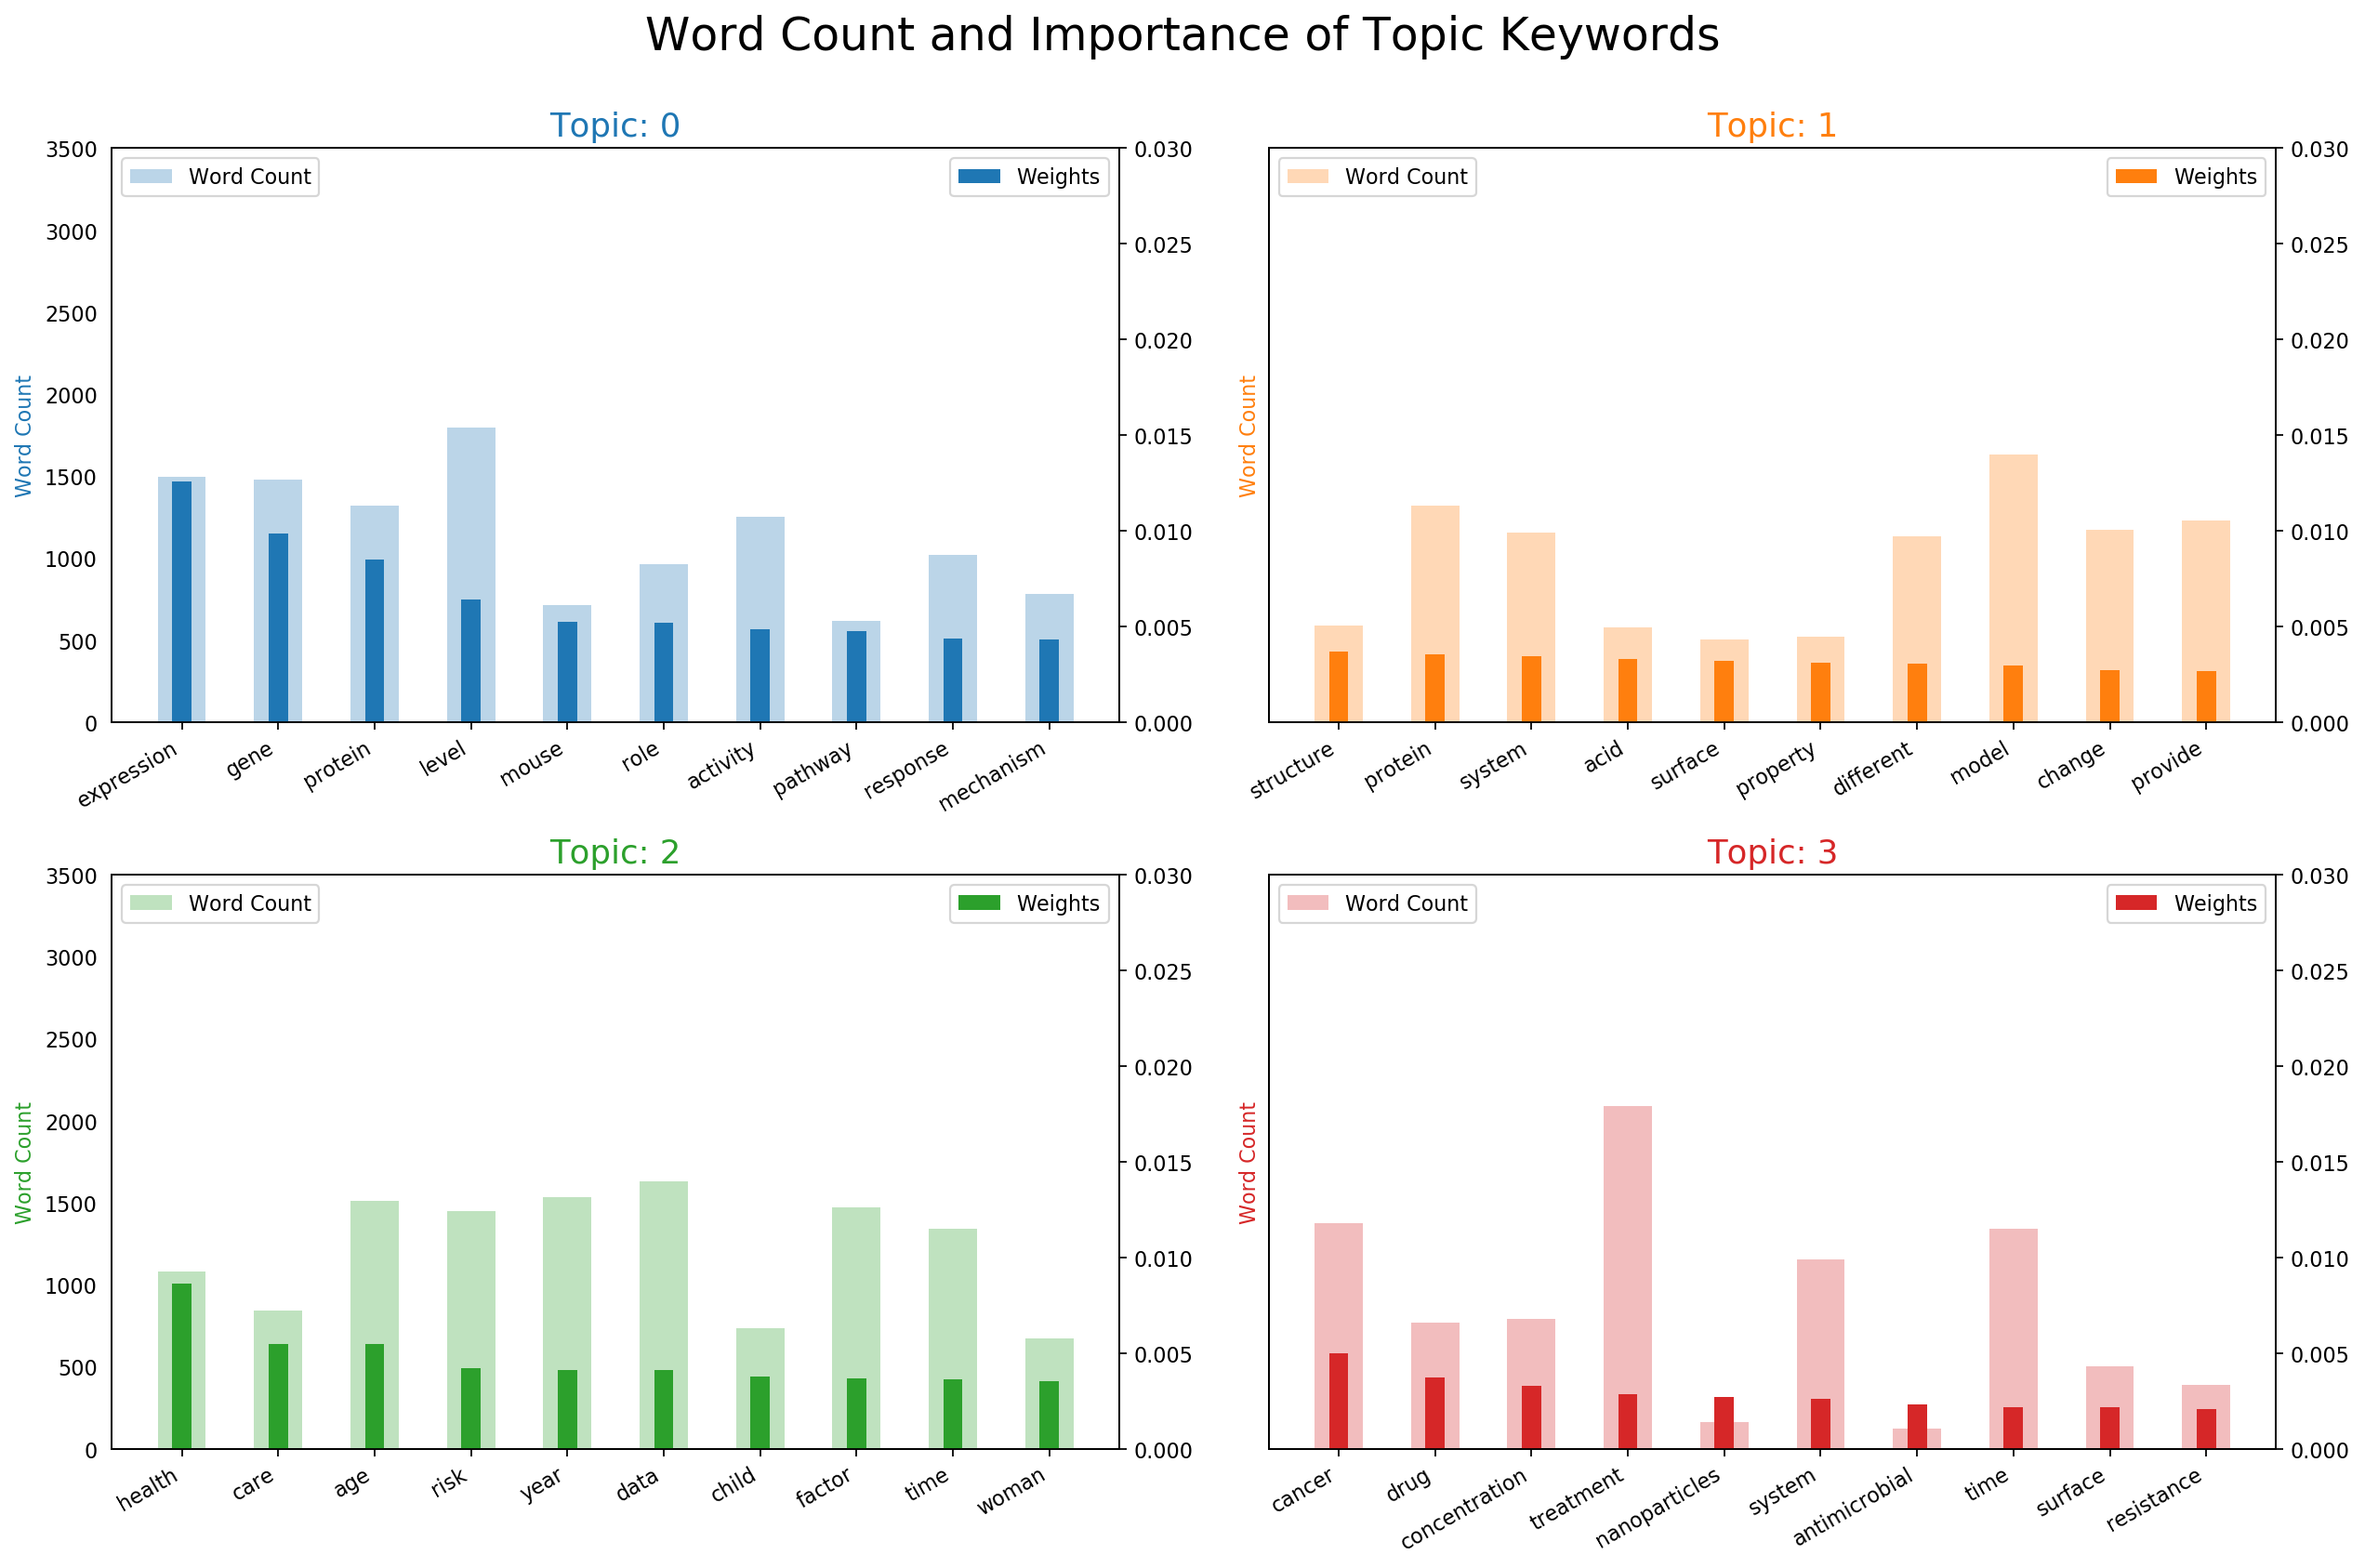

In [22]:
from collections import Counter
import matplotlib.colors as mcolors

data_ready = docs2
topics = lda_model2.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [ ]:
lda_model2.log